In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Allow to connect drive
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [4]:
# read the csv
df=pd.read_csv('/content/mount/My Drive/Colab Notebooks/Logistic_regression/framingham.csv')

In [5]:

df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
# check the null values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#get the shape of dataframe
df.shape

(4238, 16)

In [8]:
# Check for missing values and handle them by filling with mean
for col in df.columns:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)


In [9]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# print the column name
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# check duplicate value
if df.duplicated().any():
    print("Duplicate rows are present.")
else:
    print("No duplicate rows are present.")

No duplicate rows are present.


In [13]:
# statistical summary
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


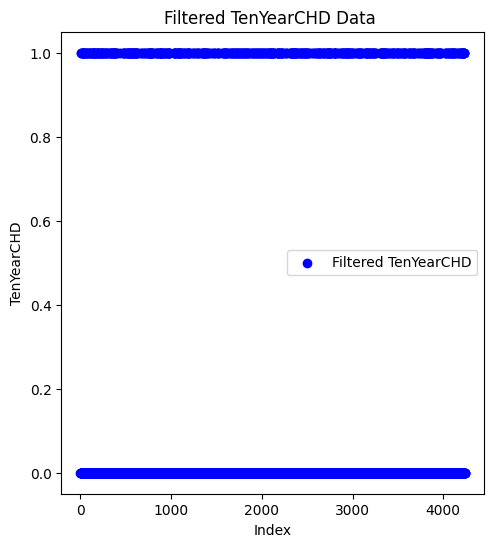

In [15]:
# Basic visualization of TenYearCHD distribution
plt.figure(figsize=(12, 6))
# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['TenYearCHD'], color='blue', label='Filtered TenYearCHD')
plt.xlabel('Index')
plt.ylabel('TenYearCHD')
plt.title('Filtered TenYearCHD Data ')
plt.legend()


In [16]:
# Check class distribution
class_counts = df['TenYearCHD'].value_counts()
print(class_counts)

imbalance_ratio = class_counts[0] / class_counts[1]
print("Imbalance Ratio:", imbalance_ratio)

TenYearCHD
0    3594
1     644
Name: count, dtype: int64
Imbalance Ratio: 5.580745341614906


In [17]:
# Prepare data for modeling
x = df.drop(columns=['male', 'age', 'education'])
y = df['TenYearCHD']

In [18]:
#split the data in to x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### SMOTE technique

In [19]:
pip install imbalanced-learn

In [20]:
# data isnot equal thats why need to equal to use SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y_train)
print("Befor smote:",counter)

Befor smote: Counter({0: 2871, 1: 519})


In [21]:
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train, y_train)
counter=Counter(y_train_sm)
print("After:",counter)

After: Counter({0: 2871, 1: 2871})


## Logistic Regression

In [22]:
# chreate model of LR
model=LogisticRegression().fit(x_train_sm, y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#model predictions
y_pred=model.predict(x_test)

In [24]:
# create a confusion matrix on that
cnf = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("Confusion Matrix:")
print(cnf)

Confusion Matrix:
[[125   0]
 [  0 723]]


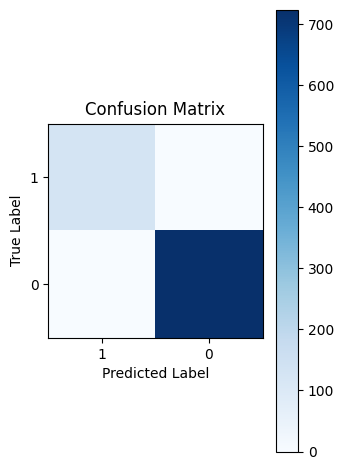

In [25]:
# visualization of confusinon matrix
plt.subplot(1, 2, 2)
plt.imshow(cnf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["1", "0"]))
plt.xticks(tick_marks, ["1", "0"])
plt.yticks(tick_marks, ["1", "0"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [26]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       125

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



## Random forest model

In [27]:
# another model RF
from sklearn.ensemble import RandomForestClassifier

In [28]:
# model of RF
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [29]:
# Predict using the Random Forest model
y_pred_rf = model_rf.predict(x_test)

Random Forest Confusion Matrix:
[[125   0]
 [  0 723]]


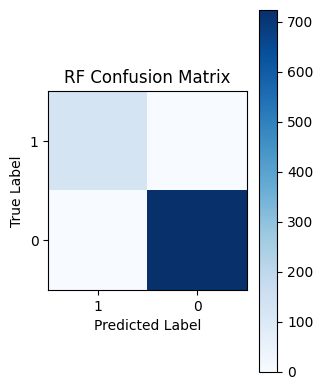

In [30]:
# Evaluate the Random Forest model
cnf_rf = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])
print("Random Forest Confusion Matrix:")
print(cnf_rf)

# Visualize the Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(cnf_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('RF Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["1", "0"]))
plt.xticks(tick_marks, ["1", "0"])
plt.yticks(tick_marks, ["1", "0"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

In [31]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       125

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



## Ensemble Modeling
#### Implement a Voting Classifier to combine predictions from Logistic Regression and Random Forest
These models are popular in machine learning because they can often improve predictive performance reduce over feet and increase the model robustness by leveraging the diversity of multiple model.

In [32]:
from sklearn.ensemble import VotingClassifier

In [33]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', model), ('rf', model_rf)], voting='soft')
voting_clf.fit(x_train_sm, y_train_sm)

# Predict using the voting classifier
y_pred_voting = voting_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Evaluate the voting classifier
cnf_voting = confusion_matrix(y_test, y_pred_voting, labels=[1, 0])
print("Voting Classifier Confusion Matrix:")
print(cnf_voting)
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Confusion Matrix:
[[125   0]
 [  0 723]]
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       125

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



## SVM MODEL

In [35]:
from sklearn.svm import SVC

In [36]:
# Train a Support Vector Machine (SVM) model
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(x_train_sm, y_train_sm)

SVC(kernel='linear', random_state=42)

In [37]:
# Predict using the SVM model
y_pred_svm = model_svm.predict(x_test)

In [38]:
# Evaluate the SVM model
cnf_svm = confusion_matrix(y_test, y_pred_svm, labels=[1, 0])
print("Support Vector Machine Confusion Matrix:")
print(cnf_svm)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Confusion Matrix:
[[125   0]
 [  0 723]]
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       125

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



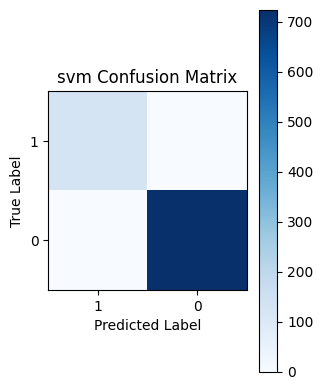

In [39]:
# Visualize the SVM Confusion Matrix
plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.imshow(cnf_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('svm Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["1", "0"]))
plt.xticks(tick_marks, ["1", "0"])
plt.yticks(tick_marks, ["1", "0"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

In [40]:
# Define stacking classifier
from sklearn.ensemble import StackingClassifier


In [41]:
# Define stacking classifier
stacked_model = StackingClassifier(
    estimators=[
        ('lr', model),
        ('rf', model_rf),
        ('svm', model_svm)
    ],
    final_estimator=LogisticRegression(),
    stack_method='auto', # Method to use for prediction
    n_jobs=-1, # processors for parallel execution
    cv=5  #cross-validation folds
)


In [42]:
# Train the stacked model (if not already trained)
stacked_model.fit(x_train_sm, y_train_sm)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svm', SVC(kernel='linear', random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [43]:
# Predict using the stacked model
y_pred_stacked = stacked_model.predict(x_test)


In [44]:
# Evaluate the stacked model
cnf_stacked = confusion_matrix(y_test, y_pred_stacked, labels=[1, 0])
print("Stacked Ensemble Confusion Matrix:")
print(cnf_stacked)
print("Stacked Ensemble Classification Report:")
print(classification_report(y_test, y_pred_stacked))

Stacked Ensemble Confusion Matrix:
[[125   0]
 [  0 723]]
Stacked Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       125

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848

